In [92]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
import matplotlib.colors as mcolors
from scipy import fftpack
from scipy.ndimage import gaussian_filter
from scipy import signal
from scipy.optimize import curve_fit
import scipy
import warnings
warnings.filterwarnings('ignore')

# Data Import

### Homogenous Cement Data

In [2]:
# Orientation one
dfo1hrun1 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run1.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun2 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run2.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun3 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run3.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun4 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run4.txt', delimiter=' ' , dtype= np.float64)

# Orientation two
dfo2hrun1 = pd.read_csv('../Data/Cement_sample/O2/O2_long/delays-from-all-runs/Run1.txt', delimiter=' ' , dtype= np.float64)
dfo2hrun2 = pd.read_csv('../Data/Cement_sample/O2/O2_long/delays-from-all-runs/Run2.txt', delimiter=' ' , dtype= np.float64)
dfo2hrun3 = pd.read_csv('../Data/Cement_sample/O2/O2_long/delays-from-all-runs/Run3.txt', delimiter=' ' , dtype= np.float64)
dfo2hrun4 = pd.read_csv('../Data/Cement_sample/O2/O2_long/delays-from-all-runs/Run4.txt', delimiter=' ' , dtype= np.float64)

In [3]:
dfO1h = pd.concat([dfo1hrun1['Delays'], dfo1hrun1['Time-delay1'], dfo1hrun2['Time-delay2'], dfo1hrun3['Time-delay3'], 
                  dfo1hrun4['Time-delay4']], axis=1)
dfO1h = dfO1h.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")

dfO1h['mean'] = dfO1h.iloc[:, 1:].mean(axis=1)
dfO1h['std'] = dfO1h.iloc[:, 1:].std(axis=1)

dfO2h = pd.concat([dfo2hrun1['Delays'], dfo2hrun1['Time-delay1'], dfo2hrun2['Time-delay2'], dfo2hrun3['Time-delay3'], 
                  dfo2hrun4['Time-delay4']], axis=1)
dfO2h = dfO2h.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")

dfO2h['mean'] = dfO2h.iloc[:, 1:].mean(axis=1)
dfO2h['std'] = dfO2h.iloc[:, 1:].std(axis=1)

### Cu Wire Cement Data (50 mm sep.)

In [5]:
# Orientation one
dfo1run1_50 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run1.txt', delimiter=' ' , dtype= np.float64)
dfo1run2_50 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run2.txt', delimiter=' ' , dtype= np.float64)
dfo1run3_50 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run3.txt', delimiter=' ' , dtype= np.float64)
dfo1run4_50 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run4.txt', delimiter=' ' , dtype= np.float64)
dfo1run5_50 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run5.txt', delimiter=' ' , dtype= np.float64)
dfo1run6_50 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run6.txt', delimiter=' ' , dtype= np.float64)
dfo1run7_50 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run7.txt', delimiter=' ' , dtype= np.float64)

# Orientation two
dfo2run1_50 = pd.read_csv('../Data/Cement_wt_cu_wires/O2/delays-from-all-runs/Run1.txt', delimiter=' ' , dtype= np.float64)
dfo2run2_50 = pd.read_csv('../Data/Cement_wt_cu_wires/O2/delays-from-all-runs/Run2.txt', delimiter=' ' , dtype= np.float64)
dfo2run3_50 = pd.read_csv('../Data/Cement_wt_cu_wires/O2/delays-from-all-runs/Run3.txt', delimiter=' ' , dtype= np.float64)
dfo2run4_50 = pd.read_csv('../Data/Cement_wt_cu_wires/O2/delays-from-all-runs/Run4.txt', delimiter=' ' , dtype= np.float64)
dfo2run5_50 = pd.read_csv('../Data/Cement_wt_cu_wires/O2/delays-from-all-runs/Run5.txt', delimiter=' ' , dtype= np.float64)

In [6]:
dfO1_50 = pd.concat([dfo1run1_50['Delays'], dfo1run1_50['Time-delay1'], dfo1run2_50['Time-delay2'], dfo1run3_50['Time-delay3'], 
                  dfo1run4_50['Time-delay4']], axis=1)
dfO1_50 = dfO1_50.rename(columns={"Delays": "Delays_Full", "Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")
dfO1_50 = pd.concat([dfO1_50, dfo1run5_50['Time-delay1'], dfo1run6_50['Time-delay2'], dfo1run7_50['Time-delay3']], axis=1)
dfO1_50 = dfO1_50.rename(columns={"Time-delay1": "Run5", "Time-delay2": "Run6", "Time-delay3": "Run7"}, 
                   errors="raise")
dfO1_50['mean'] = dfO1_50.iloc[:, 3:].mean(axis=1)
dfO1_50['std'] = dfO1_50.iloc[:, 3:].std(axis=1)

dfO2_50 = pd.concat([dfo2run1_50['Delays'], dfo2run1_50['Time-delay1'], dfo2run2_50['Time-delay2'], dfo2run3_50['Time-delay3'], 
                  dfo2run4_50['Time-delay4']], axis=1)
dfO2_50 = dfO2_50.rename(columns={"Delays": "Delays", "Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")
dfO2_50 = pd.concat([dfO2_50, dfo2run5_50['Time-delay1']], axis=1)
dfO2_50 = dfO2_50.rename(columns={"Time-delay1": "Run5"}, 
                   errors="raise")
dfO2_50['mean'] = dfO2_50.iloc[:, 1:].mean(axis=1)
dfO2_50['std'] = dfO2_50.iloc[:, 1:].std(axis=1)

### Cu Wire Cement Data (100 mm sep.)

In [7]:
# Orientation one
dfo1run1_100 = pd.read_csv('../Data/Cement_wt_cu_wires_2/O1/delays-from-all-runs/Run1.txt', delimiter=' ' , dtype= np.float64)
dfo1run2_100 = pd.read_csv('../Data/Cement_wt_cu_wires_2/O1/delays-from-all-runs/Run2.txt', delimiter=' ' , dtype= np.float64)
dfo1run3_100 = pd.read_csv('../Data/Cement_wt_cu_wires_2/O1/delays-from-all-runs/Run3.txt', delimiter=' ' , dtype= np.float64)
dfo1run4_100 = pd.read_csv('../Data/Cement_wt_cu_wires_2/O1/delays-from-all-runs/Run4.txt', delimiter=' ' , dtype= np.float64)
dfo1run5_100 = pd.read_csv('../Data/Cement_wt_cu_wires_2/O1/delays-from-all-runs/Run5.txt', delimiter=' ' , dtype= np.float64)

In [8]:
dfO1_100 = pd.concat([dfo1run1_100['Delays'], dfo1run1_100['Time-delay1'], dfo1run2_100['Time-delay2'], 
                      dfo1run3_100['Time-delay3'], dfo1run4_100['Time-delay4']], axis=1)
dfO1_100 = dfO1_100.rename(columns={"Delays": "Delays_Full", "Time-delay1": "Run1", "Time-delay2": "Run2",
                                    "Time-delay3": "Run3", "Time-delay4": "Run4"}, errors="raise")
dfO1_100 = pd.concat([dfO1_100, dfo1run5_100['Time-delay1']], axis=1)
dfO1_100 = dfO1_100.rename(columns={"Time-delay1": "Run5"}, 
                   errors="raise")
dfO1_100['mean'] = dfO1_100.iloc[:, 1:].mean(axis=1)
dfO1_100['std'] = dfO1_100.iloc[:, 1:].std(axis=1)

# Comparison: individual plotting

In [9]:
labels = ['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5']

### Cu Wire Cement (50 mm sep.) Orientation One

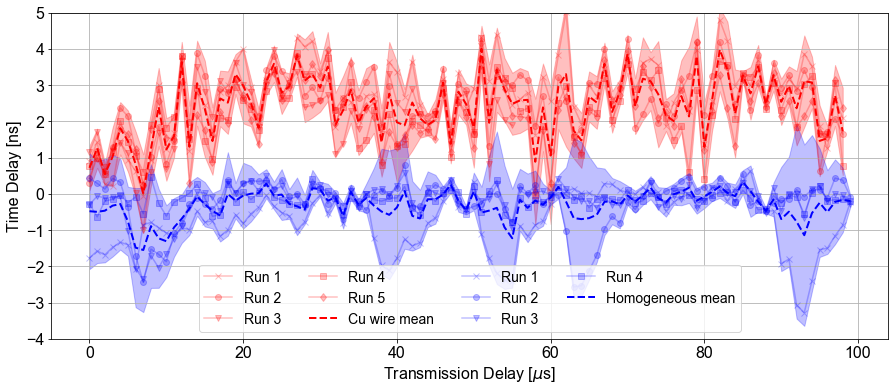

In [14]:
plt.figure(figsize=(15,6))
[plt.plot(dfO1_50['Delays_Full'], dfO1_50[r], p, label = l, alpha = 0.25, color = 'r')
 for r, p, l in zip(dfO1_50.keys()[3:8], ['-x', '-o', '-v', '-s', '-d', '-*'], labels)]

plt.plot(dfO1_50['Delays_Full'], dfO1_50['mean'], '--', color = 'r', label = 'Cu wire mean', linewidth = 2)
plt.fill_between(dfO1_50.index, dfO1_50['mean'] - 2*dfO1_50['std'], dfO1_50['mean'] + 2*dfO1_50['std'],
                alpha=.25, color = 'r')

[plt.plot(dfO1h['Delays'], dfO1h[r], p, label = l, alpha = 0.25, color = 'b') for r, p, l in zip(dfO1h.keys()[1:5], ['-x', '-o', '-v', '-s', '-d', '-*'], labels)]
plt.plot(dfO1h['Delays'], dfO1h['mean'], '--', color = 'b', label = 'Homogeneous mean', linewidth = 2)
plt.fill_between(dfO1h.index, dfO1h['mean'] - 2*dfO1h['std'], dfO1h['mean'] + 2*dfO1h['std'],
                alpha=.25, color = 'b')

plt.grid()
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
frame1 = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
plt.ylim(-4, 5)
plt.legend(loc='lower center', fontsize=14, ncol = 4)
# plt.title('Orientation One')
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Cu_wires/Cu-wiresvsHomocementO1.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Homocement/HomocementO1.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
plt.show()

### Cu Wire Cement (50 mm sep.) Orientation Two

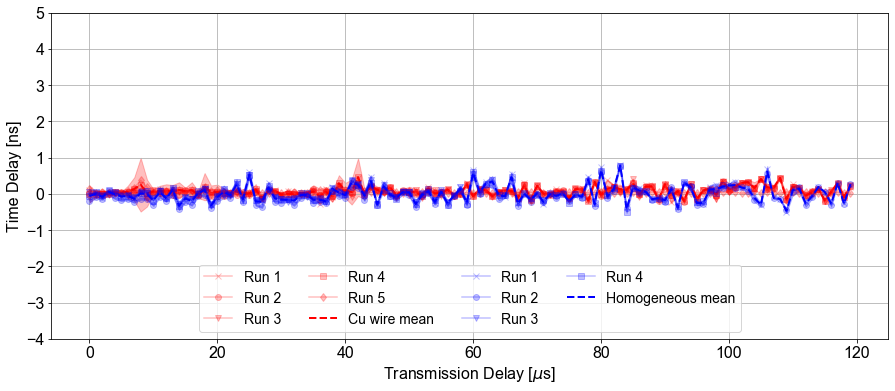

In [15]:
plt.figure(figsize=(15,6))
[plt.plot(dfO2_50['Delays'], dfO2_50[r], p, label = l, alpha = 0.25, color = 'r')
 for r, p, l in zip(dfO2_50.keys()[3:8], ['-x', '-o', '-v', '-s', '-d', '-*'], labels)]

plt.plot(dfO2_50['Delays'], dfO2_50['mean'], '--', color = 'r', label = 'Cu wire mean', linewidth = 2)
plt.fill_between(dfO2_50.index, dfO2_50['mean'] - 2*dfO2_50['std'], dfO2_50['mean'] + 2*dfO2_50['std'],
                alpha=.25, color = 'r')

[plt.plot(dfO2h['Delays'], dfO2h[r], p, label = l, alpha = 0.25, color = 'b') 
 for r, p, l in zip(dfO2h.keys()[1:5], ['-x', '-o', '-v', '-s', '-d', '-*'], labels)]
plt.plot(dfO2h['Delays'], dfO2h['mean'], '--', color = 'b', label = 'Homogeneous mean', linewidth = 2)
plt.fill_between(dfO2h.index, dfO2h['mean'] - 2*dfO2h['std'], dfO2h['mean'] + 2*dfO2h['std'],
                alpha=.25, color = 'b')

plt.grid()
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
frame1 = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
plt.ylim(-4, 5)
plt.legend(loc='lower center', fontsize=14, ncol = 4)
# plt.title('Orientation One')
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Cu_wires/Cu-wiresvsHomocementO1.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Homocement/HomocementO1.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
plt.show()

### Cu Wire Cement (100 mm sep.) Orientation One

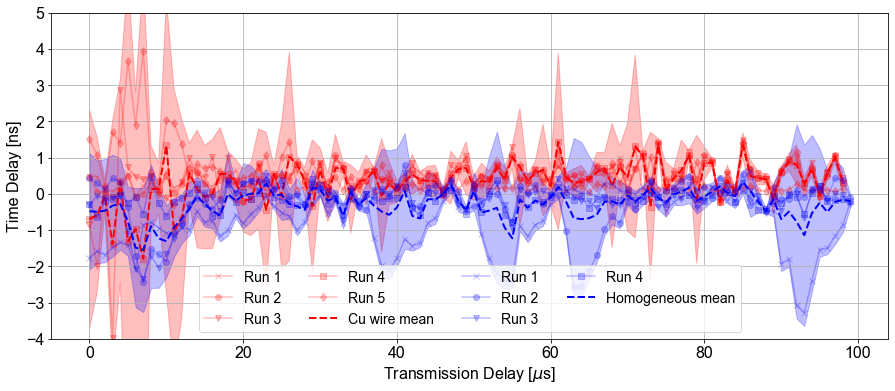

In [16]:
plt.figure(figsize=(15,6))
[plt.plot(dfO1_100['Delays_Full'], dfO1_100[r], p, label = l, alpha = 0.25, color = 'r')
 for r, p, l in zip(dfO1_100.keys()[3:8], ['-x', '-o', '-v', '-s', '-d', '-*'], labels)]

plt.plot(dfO1_100['Delays_Full'], dfO1_100['mean'], '--', color = 'r', label = 'Cu wire mean', linewidth = 2)
plt.fill_between(dfO1_100.index, dfO1_100['mean'] - 2*dfO1_100['std'], dfO1_100['mean'] + 2*dfO1_100['std'],
                alpha=.25, color = 'r')

[plt.plot(dfO1h['Delays'], dfO1h[r], p, label = l, alpha = 0.25, color = 'b') for r, p, l in zip(dfO1h.keys()[1:5], ['-x', '-o', '-v', '-s', '-d', '-*'], labels)]
plt.plot(dfO1h['Delays'], dfO1h['mean'], '--', color = 'b', label = 'Homogeneous mean', linewidth = 2)
plt.fill_between(dfO1h.index, dfO1h['mean'] - 2*dfO1h['std'], dfO1h['mean'] + 2*dfO1h['std'],
                alpha=.25, color = 'b')

plt.grid()
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
frame1 = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
plt.ylim(-4, 5)
plt.legend(loc='lower center', fontsize=14, ncol = 4)
# plt.title('Orientation One')
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Cu_wires/Cu-wiresvsHomocementO1.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Homocement/HomocementO1.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
plt.show()

### Cu Wire Cement (100 mm sep.) Orientation Two

# Comparison: joint plotting

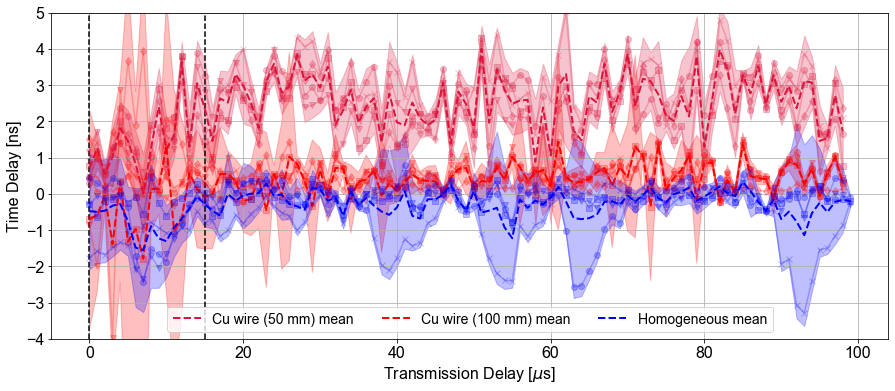

In [27]:
plt.figure(figsize=(15,6))
[plt.plot(dfO1_50['Delays_Full'], dfO1_50[r], p, alpha = 0.25, color = 'crimson')
 for r, p in zip(dfO1_50.keys()[3:8], ['-x', '-o', '-v', '-s', '-d', '-*'])]

plt.plot(dfO1_50['Delays_Full'], dfO1_50['mean'], '--', color = 'crimson', label = 'Cu wire (50 mm) mean', linewidth = 2)
plt.fill_between(dfO1_50.index, dfO1_50['mean'] - 2*dfO1_50['std'], dfO1_50['mean'] + 2*dfO1_50['std'],
                alpha=.25, color = 'crimson')

[plt.plot(dfO1_100['Delays_Full'], dfO1_100[r], p, alpha = 0.25, color = 'r')
 for r, p in zip(dfO1_100.keys()[3:8], ['-x', '-o', '-v', '-s', '-d', '-*'])]

plt.plot(dfO1_100['Delays_Full'], dfO1_100['mean'], '--', color = 'r', label = 'Cu wire (100 mm) mean', linewidth = 2)
plt.fill_between(dfO1_100.index, dfO1_100['mean'] - 2*dfO1_100['std'], dfO1_100['mean'] + 2*dfO1_100['std'],
                alpha=.25, color = 'r')

[plt.plot(dfO1h['Delays'], dfO1h[r], p, alpha = 0.25, color = 'b') for r, p in zip(dfO1h.keys()[1:5], ['-x', '-o', '-v', '-s', '-d', '-*'])]
plt.plot(dfO1h['Delays'], dfO1h['mean'], '--', color = 'b', label = 'Homogeneous mean', linewidth = 2)
plt.fill_between(dfO1h.index, dfO1h['mean'] - 2*dfO1h['std'], dfO1h['mean'] + 2*dfO1h['std'],
                alpha=.25, color = 'b')

plt.vlines(15, -4, 5, linestyle='--')
plt.vlines(0, -4, 5, linestyle='--')

plt.grid()
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
frame1 = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
plt.ylim(-4, 5)
plt.legend(loc='lower center', fontsize=14, ncol = 4)
# plt.title('Orientation One')
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Cu_wires/Cu-wiresvsHomocementO1.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Homocement/HomocementO1.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
plt.show()

# Noise Characterization

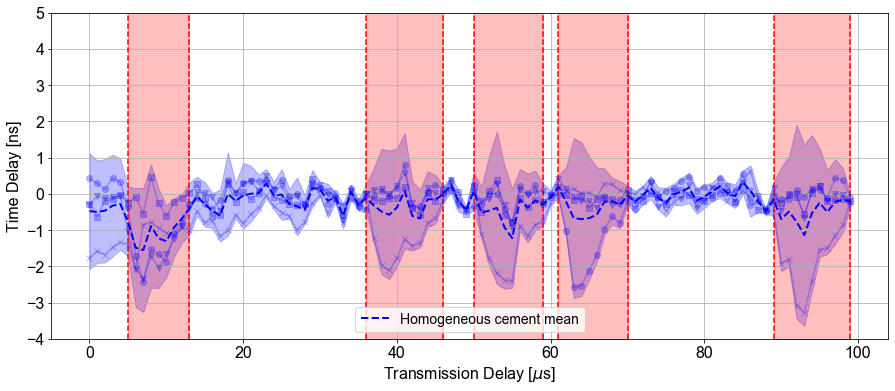

In [59]:
plt.figure(figsize=(15,6))
[plt.plot(dfO1h['Delays'], dfO1h[r], p, alpha = 0.25, color = 'b') for r, p in zip(dfO1h.keys()[1:5], ['-x', '-o', '-v', '-s', '-d', '-*'])]
plt.plot(dfO1h['Delays'], dfO1h['mean'], '--', color = 'b', label = 'Homogeneous cement mean', linewidth = 2)
plt.fill_between(dfO1h.index, dfO1h['mean'] - 2*dfO1h['std'], dfO1h['mean'] + 2*dfO1h['std'],
                alpha=.25, color = 'b')

plt.vlines(5, -4, 5, 'r', linestyle='--')
plt.vlines(13, -4, 5, 'r', linestyle='--')
plt.vlines(36, -4, 5, 'r', linestyle='--')
plt.vlines(46, -4, 5, 'r', linestyle='--')
plt.vlines(50, -4, 5, 'r', linestyle='--')
plt.vlines(59, -4, 5, 'r', linestyle='--')
plt.vlines(61, -4, 5, 'r', linestyle='--')
plt.vlines(70, -4, 5, 'r', linestyle='--')
plt.vlines(89, -4, 5, 'r', linestyle='--')
plt.vlines(99, -4, 5, 'r', linestyle='--')

plt.fill_between(dfO1h.index[5:14], -4, 5, alpha=.25, color = 'r')
plt.fill_between(dfO1h.index[36:47], -4, 5, alpha=.25, color = 'r')
plt.fill_between(dfO1h.index[50:60], -4, 5, alpha=.25, color = 'r')
plt.fill_between(dfO1h.index[61:71], -4, 5, alpha=.25, color = 'r')
plt.fill_between(dfO1h.index[89:100], -4, 5, alpha=.25, color = 'r')

plt.grid()
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
frame1 = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
plt.ylim(-4, 5)
plt.legend(loc='lower center', fontsize=14, ncol = 4)
# plt.title('Orientation One')
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Cu_wires/Cu-wiresvsHomocementO1.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Homocement/HomocementO1.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
plt.show()

In [121]:
def line(x, m, b):
    return m*x+b

In [123]:
def power(x, m, b):
    return m*x**2+b

In [111]:
def fit(f, x, y, p0, bounds):
    pars=[]
    covs=[]
    par, cov = curve_fit(f=f, xdata=x, ydata=y, p0=p0, bounds=bounds)
    pars.append(par)
    covs.append(cov)
    
    return pars, covs

In [142]:
pars_line035, covs_line035 = fit(line, dfO1h['Delays'][:35],  dfO1h['Run4'][:35], [0,0], (-np.inf, np.inf))
pars_pow035, covs_pow035 = fit(power, dfO1h['Delays'][:35], dfO1h['Run1'][:35], [0,0], (-np.inf, np.inf)) 

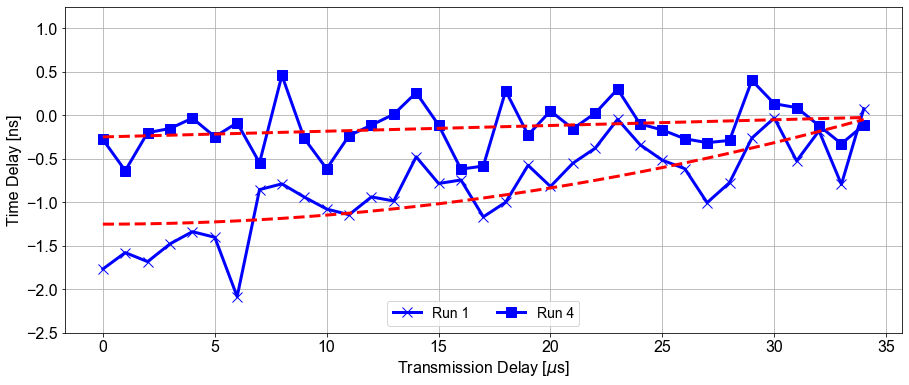

In [143]:
plt.figure(figsize=(15,6))

plt.plot(dfO1h['Delays'][:35], dfO1h['Run1'][:35], '-xb', label = 'Run 1', linewidth = 3, markersize=10)
plt.plot(dfO1h['Delays'][:35], dfO1h['Run4'][:35], '-sb', label = 'Run 4', linewidth = 3, markersize=10)
plt.plot(dfO1h['Delays'][:35], line(dfO1h['Delays'][:35], pars_line035[0][0], pars_line035[0][1]), '--r', linewidth = 3)
plt.plot(dfO1h['Delays'][:35], power(dfO1h['Delays'][:35], pars_pow035[0][0], pars_pow035[0][1]), '--r', linewidth = 3)

plt.grid()
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
frame1 = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
plt.ylim(-2.5, 1.25)
plt.legend(loc='lower center', fontsize=14, ncol = 4)
# plt.title('Orientation One')
plt.savefig('c:/users/Jacob/Nonlinearity/Images/Noise/Transducer-couplent-noise.pdf',
            dpi=300, bbox_inches='tight', format='pdf')
plt.show()